## Diabetes-Vorhersage

Wir importieren zunächst Keras und Numpy und laden den Datensatz.

In [1]:
import keras

C:\Users\Sebastian\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [2]:
import numpy as np

In [6]:
data = np.loadtxt('diabetes.csv', delimiter=',')

Die Daten bestehen aus 8 features mit Diabetes-Indikatoren sowie einem binären Ausgabewert, welcher angibt ob der Patient fünf Jahre später Diabetes entwickelt hat. 

In [7]:
data

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [8]:
data.shape

(768, 9)

Wir trennen die Daten in Trainings- und Testdaten auf.

In [9]:
X = data[:,:8]

In [10]:
y = data[:, 8]

Wir verwenden ein sequentielles Netzwerk, d.h. eines bei welchem Informationen lediglich von einer Lage zur nächsten weiter gegeben werden.

In [11]:
from keras.models import Sequential

Wir bauen nun zunächst das Netzwerk Lage für Lage auf, und müssen dazu zunächst eine Instanz eines sequentiellen Netzwerken initialisieren.

In [12]:
model = Sequential()

Unser Netzwerk besteht lediglich aus dichten Lagen.

In [13]:
from keras.layers import Dense

Der ersten Lage muss die Input-Dimension, d.h. die Anzahl features vorgegeben werden. Jede Lage benötigt darüber hinaus eine Initialisation der Gewichte sowie eine nichtlineare Aktivierungsfunktion.

In [16]:
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))

In [18]:
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))

Die Ausgabelage muss der Problemstellung entsprechen. Hier handelt es sich lediglich um eine Ja/Nein-Entscheidung, d.h. eine binäre Klassifikation, es wird daher lediglich ein Knoten verwendet welcher die Wahrscheinlichkeit ausgibt.

In [19]:
model.add(Dense(1, kernel_initializer='uniform', activation='relu'))

Unser Netzwerk ist vollständig aufgebaut und kann nun kompiliert werden, d.h. wir versehen es mit einer loss-Funktion, einer Optimierungsmethode und einer Auswertungsmetrik. 

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Nun kann das Netzwerk mit den oben bereit gestellten Daten trainiert werden.

In [21]:
model.fit(X, y, epochs=150, batch_size=10, verbose=2)

Epoch 1/150
 - 0s - loss: 1.1076 - acc: 0.6576
Epoch 2/150
 - 0s - loss: 0.6063 - acc: 0.6771
Epoch 3/150
 - 0s - loss: 0.5989 - acc: 0.6758
Epoch 4/150
 - 0s - loss: 0.5932 - acc: 0.6810
Epoch 5/150
 - 0s - loss: 0.5918 - acc: 0.6901
Epoch 6/150
 - 0s - loss: 0.5845 - acc: 0.6797
Epoch 7/150
 - 0s - loss: 0.5824 - acc: 0.6901
Epoch 8/150
 - 0s - loss: 0.5732 - acc: 0.6953
Epoch 9/150
 - 0s - loss: 0.5675 - acc: 0.7266
Epoch 10/150
 - 0s - loss: 0.5627 - acc: 0.7240
Epoch 11/150
 - 0s - loss: 0.5531 - acc: 0.7057
Epoch 12/150
 - 0s - loss: 0.5474 - acc: 0.7266
Epoch 13/150
 - 0s - loss: 0.5503 - acc: 0.7292
Epoch 14/150
 - 0s - loss: 0.5411 - acc: 0.7435
Epoch 15/150
 - 0s - loss: 0.5561 - acc: 0.7357
Epoch 16/150
 - 0s - loss: 0.5641 - acc: 0.7227
Epoch 17/150
 - 0s - loss: 0.5453 - acc: 0.7214
Epoch 18/150
 - 0s - loss: 0.5411 - acc: 0.7370
Epoch 19/150
 - 0s - loss: 0.5620 - acc: 0.7253
Epoch 20/150
 - 0s - loss: 0.5409 - acc: 0.7266
Epoch 21/150
 - 0s - loss: 0.5335 - acc: 0.7292
E

Zu guter Letzt machen wir Vorhersagen über die Trainingsdatenpunkte (in der Realität würden wir Vorhersagen für neue Patienten treffen wollen).

In [22]:
predictions = model.predict(X)

In [23]:
predictions

array([[0.5895569 ],
       [0.07209119],
       [0.73943496],
       [0.06971409],
       [0.56744736],
       [0.16736916],
       [0.07916891],
       [0.70113474],
       [0.70780486],
       [0.0841507 ],
       [0.18372138],
       [0.8001631 ],
       [0.5328422 ],
       [0.71191406],
       [0.555714  ],
       [0.47276732],
       [0.2875331 ],
       [0.19324683],
       [0.35026702],
       [0.21732982],
       [0.30933672],
       [0.2545547 ],
       [0.8757068 ],
       [0.33838716],
       [0.5762364 ],
       [0.4197745 ],
       [0.56793463],
       [0.07042789],
       [0.52501196],
       [0.24016228],
       [0.34543806],
       [0.46688247],
       [0.0728752 ],
       [0.06707445],
       [0.3895758 ],
       [0.13321255],
       [0.53622144],
       [0.31856197],
       [0.1429341 ],
       [0.3741851 ],
       [0.6868686 ],
       [0.46828988],
       [0.1393371 ],
       [0.76773703],
       [0.57003015],
       [0.8659701 ],
       [0.4002729 ],
       [0.060

Wir wandeln noch die Wahrscheinlichkeiten in eine Ja/Nein-Vorhersage um.

In [24]:
rounded = [round(x[0]) for x in predictions]

In [25]:
print(rounded)

[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,

### MNIST: Vorhersage handschriftlicher Ziffern

In [30]:
from keras.datasets import mnist

In [ ]:
data = mnist.load_data()

In [26]:
data = np.load('mnist.npz')

In [27]:
data.keys()

['x_test', 'x_train', 'y_train', 'y_test']

In [36]:
X_train = data['x_train']
X_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']

In [66]:
X_test_plot = data['x_test']

In [31]:
print(X_train.shape)

(60000, 28, 28)


In [32]:
import matplotlib.pyplot as plt

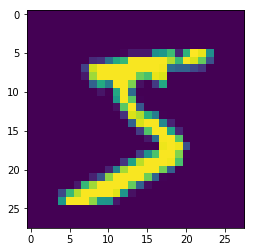

In [33]:
plt.imshow(X_train[0])

In [37]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [38]:
print(X_train.shape)

(60000, 28, 28, 1)


In [40]:
X_train = X_train.astype('float32')

In [41]:
X_test = X_test.astype('float32')

In [42]:
X_train /= 255

In [43]:
X_test /= 255

In [44]:
y_train.shape

(60000,)

In [45]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [46]:
from keras.utils import np_utils

In [47]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [48]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [49]:
model = Sequential()

In [50]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

In [51]:
model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(28,28,1)))

In [52]:
model.add(Convolution2D(32, (3,3), activation='relu'))

In [53]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [54]:
model.add(Dropout(0.25))

In [55]:
model.add(Flatten())

In [56]:
model.add(Dense(128, activation='relu'))

In [57]:
model.add(Dropout(0.25))

In [58]:
model.add(Dense(10, activation='softmax'))

In [59]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10)

C:\Users\Sebastian\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 157s 3ms/step - loss: 0.1530 - acc: 0.9533
Epoch 2/10
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0582 - acc: 0.9825
Epoch 3/10
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0435 - acc: 0.9866
Epoch 4/10
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0345 - acc: 0.9890
Epoch 5/10
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0302 - acc: 0.9905
Epoch 6/10
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0239 - acc: 0.9921
Epoch 7/10
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0205 - acc: 0.9931
Epoch 8/10
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0171 - acc: 0.9945
Epoch 9/10
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0155 - acc: 0.9949
Epoch 10/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0152 - a

In [62]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [63]:
score

[0.03348006168393522, 0.9925]

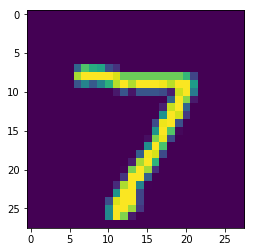

In [67]:
plt.imshow(X_test_plot[0])

In [69]:
model.predict(X_test)[0]

array([4.04813854e-17, 4.27083976e-12, 3.23459569e-16, 8.13762252e-12,
       7.12233578e-19, 1.30600265e-16, 6.17592616e-24, 1.00000000e+00,
       1.02562075e-17, 1.10087122e-11], dtype=float32)

In [70]:
predictions = model.predict(X_test)

In [77]:
maximum = predictions.max(axis=1)

In [96]:
worst = [pos for pos in range(len(maximum)) if maximum[pos] < 0.5]

In [97]:
worst

[659, 2109, 3225, 3558, 3778]

In [95]:
maximum[maximum < 0.5]

array([0.4468845 , 0.49009094, 0.4399654 , 0.45273992, 0.48349267],
      dtype=float32)

[1.8582364e-08 4.4688451e-01 4.4022337e-01 1.0641524e-04 2.0676863e-07
 2.8719619e-08 4.8901544e-08 1.1275269e-01 1.0769197e-05 2.1960152e-05]


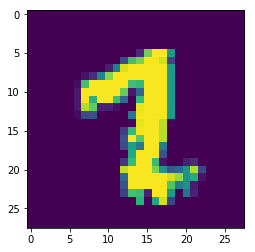

In [101]:
print(predictions[worst[0]])
plt.imshow(X_test_plot[worst[0]])

In [106]:
y_test[worst[0]]

2

[1.11594955e-08 3.62636627e-07 4.90090936e-01 7.70639032e-02
 4.63825527e-05 1.42198387e-05 9.87513715e-09 3.44737507e-02
 2.82777622e-02 3.70032668e-01]


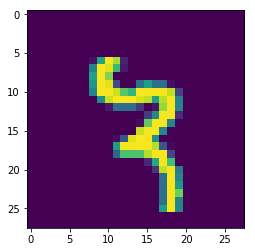

In [102]:
print(predictions[worst[1]])
plt.imshow(X_test_plot[worst[1]])

In [107]:
y_test[worst[1]]

3

[2.9086951e-07 2.9520717e-01 2.5429060e-06 1.8368043e-08 7.7149051e-04
 1.6801668e-08 3.4765837e-09 2.6258096e-01 1.4720911e-03 4.3996540e-01]


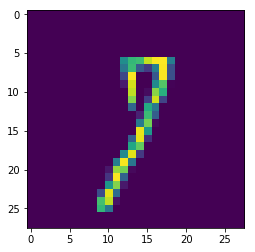

In [103]:
print(predictions[worst[2]])
plt.imshow(X_test_plot[worst[2]])

In [108]:
y_test[worst[2]]

7

[4.5273992e-01 1.6775812e-04 1.7671537e-04 3.9434606e-01 5.1602549e-03
 1.3727109e-01 2.6351993e-03 5.2576601e-03 9.3135604e-05 2.1522050e-03]


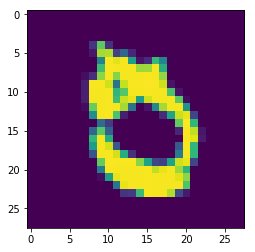

In [104]:
print(predictions[worst[3]])
plt.imshow(X_test_plot[worst[3]])

In [109]:
y_test[worst[3]]

5

[1.35544411e-04 7.51636890e-07 1.00647576e-01 6.27233589e-04
 2.79875144e-06 4.83492672e-01 9.12043499e-04 1.12293565e-04
 3.85679334e-01 2.83897724e-02]


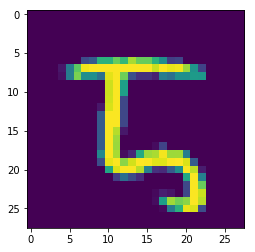

In [105]:
print(predictions[worst[4]])
plt.imshow(X_test_plot[worst[4]])

In [110]:
y_test[worst[4]]

5